In [2]:
#Importing Required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Loading Data

In [3]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [4]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Explanatory Data Analysis

In [5]:
# Check Shape and columns
print(df.shape)
print(df.columns)

(614, 13)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [6]:
# Satatistical info
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Checking Columns having missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

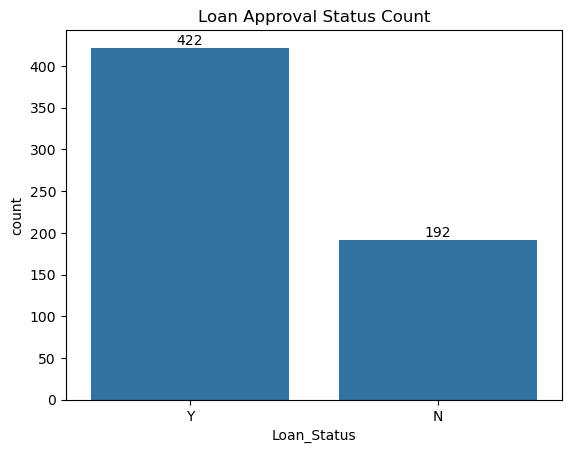

In [8]:
# Target Variable Distribution
ax = sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Status Count')
ax.bar_label(ax.containers[0])

plt.show()

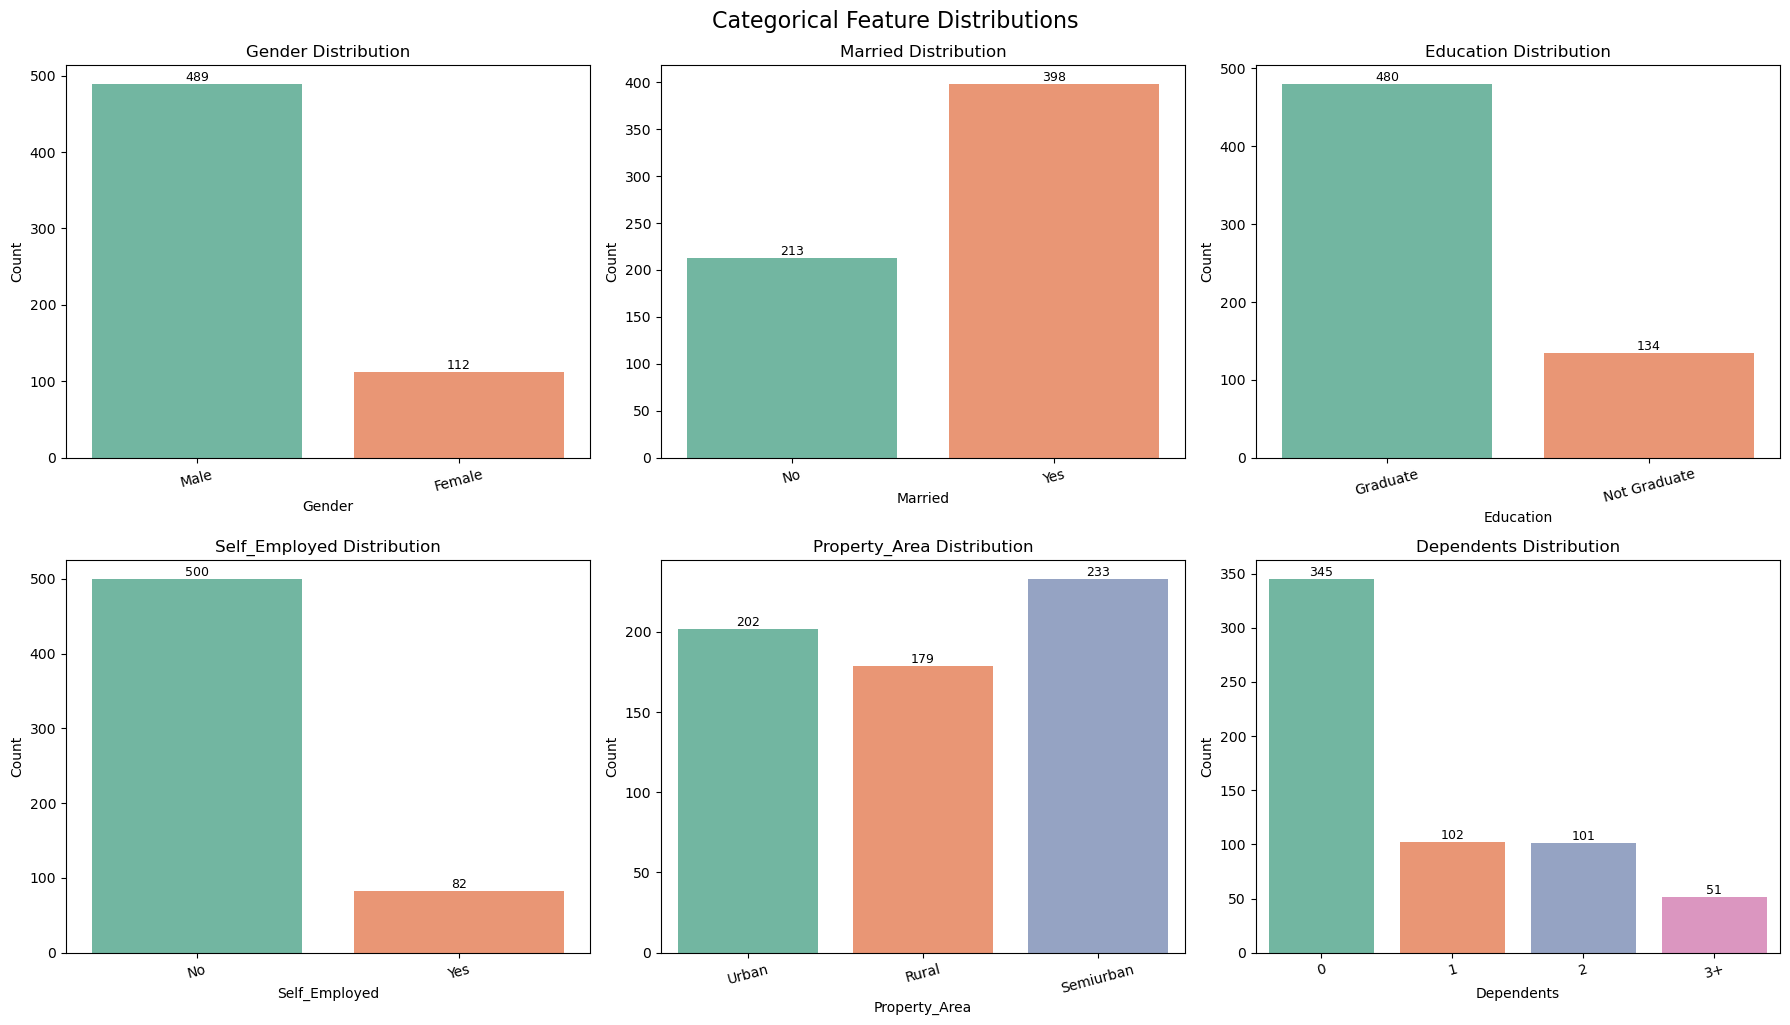

In [9]:
# Univariate Analysis (Categorical)
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']

plt.figure(figsize=(18, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    ax = sns.countplot(x=col, hue=col, data=df, palette='Set2', legend=False)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=15)

    # Add labels on top of bars
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.suptitle('Categorical Feature Distributions', fontsize=16, y=1.02)
plt.show()


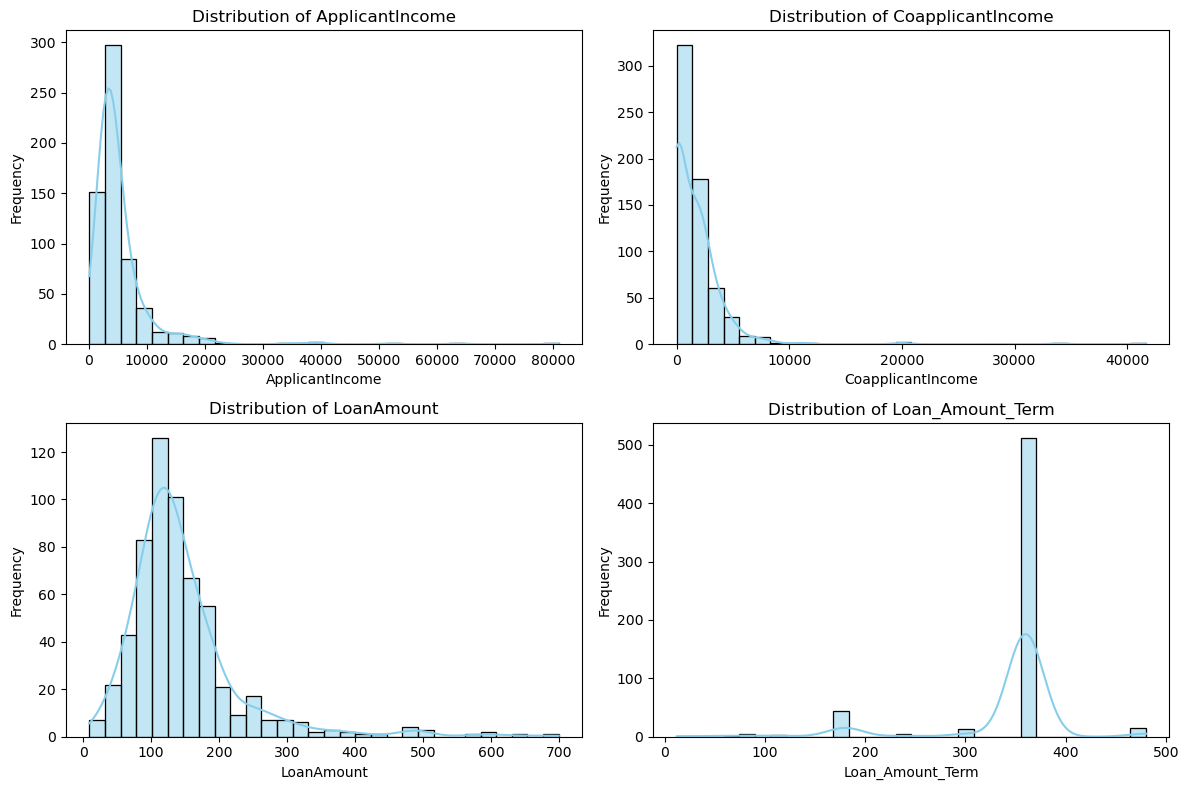

In [10]:
#Univariate Analysis (Numerical)

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

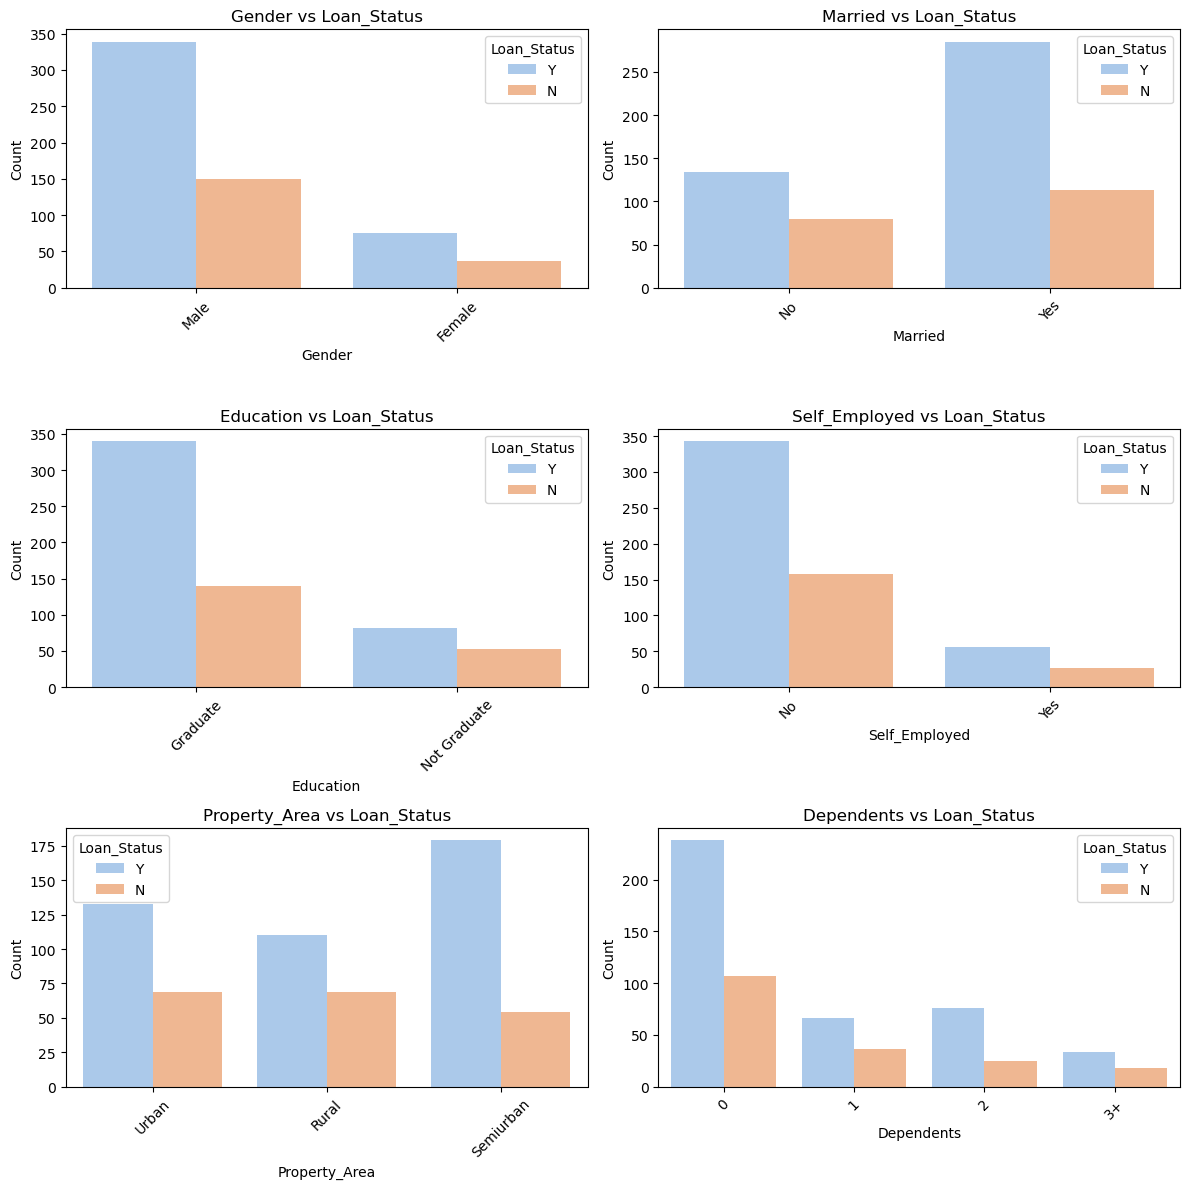

In [11]:
# Bivariate Analysis (Categorical vs Target)
plt.figure(figsize=(12, 4 * 3))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, hue='Loan_Status', data=df, palette='pastel')
    plt.title(f'{col} vs Loan_Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


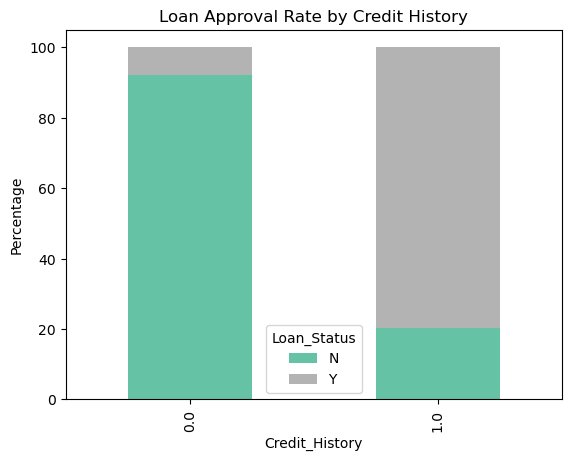

In [12]:
#Credit History vs Loan_Status
credit_approval = pd.crosstab(df['Credit_History'], df['Loan_Status'], normalize='index') * 100
credit_approval.plot(kind='bar', stacked=True, colormap='Set2')
plt.ylabel('Percentage')
plt.title('Loan Approval Rate by Credit History')
plt.show()

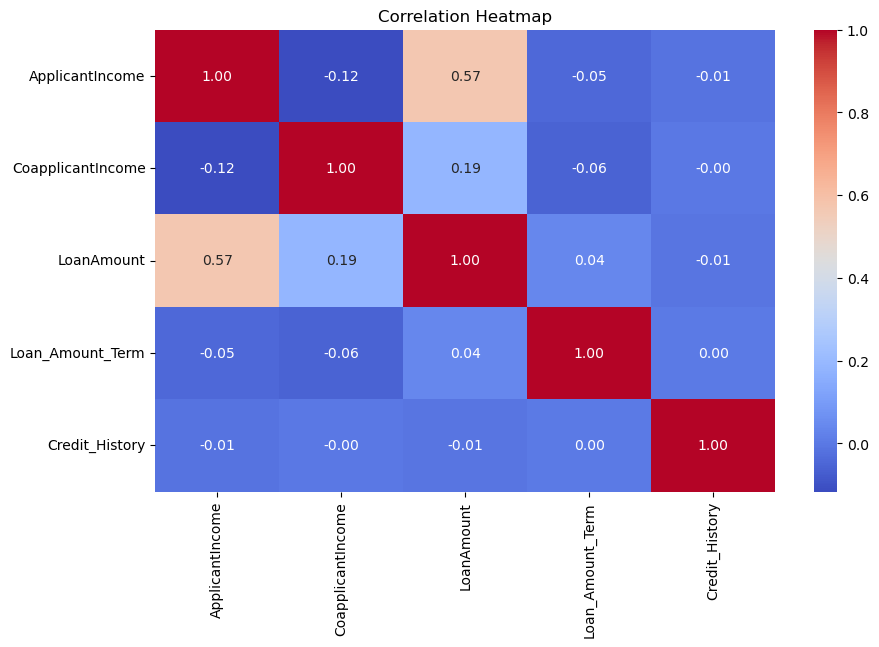

In [13]:
# Correlation Heatmap
numeric_data = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

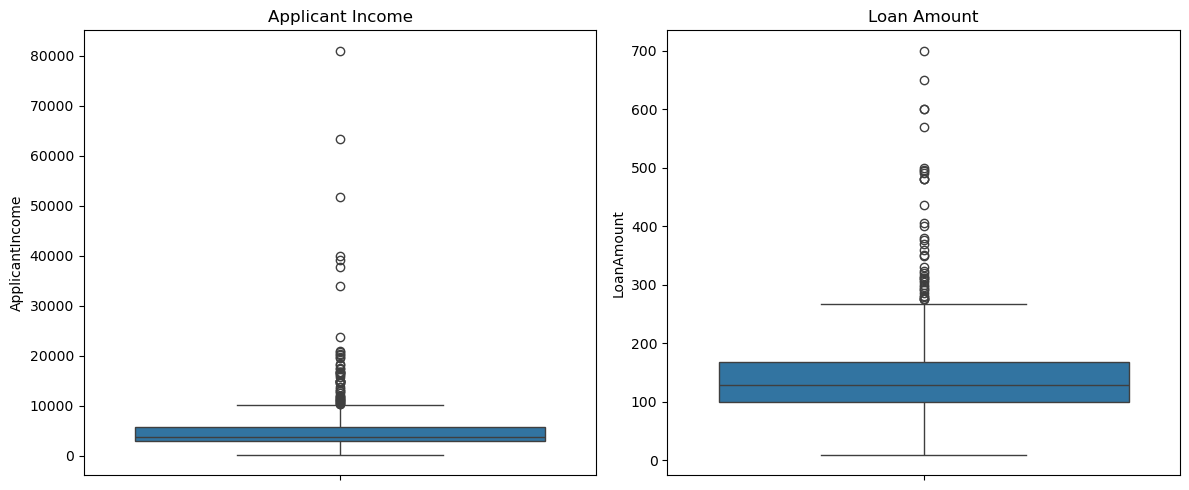

In [14]:
#Boxplot for outlier

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(ax=axes[0], y=df['ApplicantIncome'])
axes[0].set_title('Applicant Income')

sns.boxplot(ax=axes[1], y=df['LoanAmount'])
axes[1].set_title('Loan Amount')

plt.tight_layout()
plt.show()

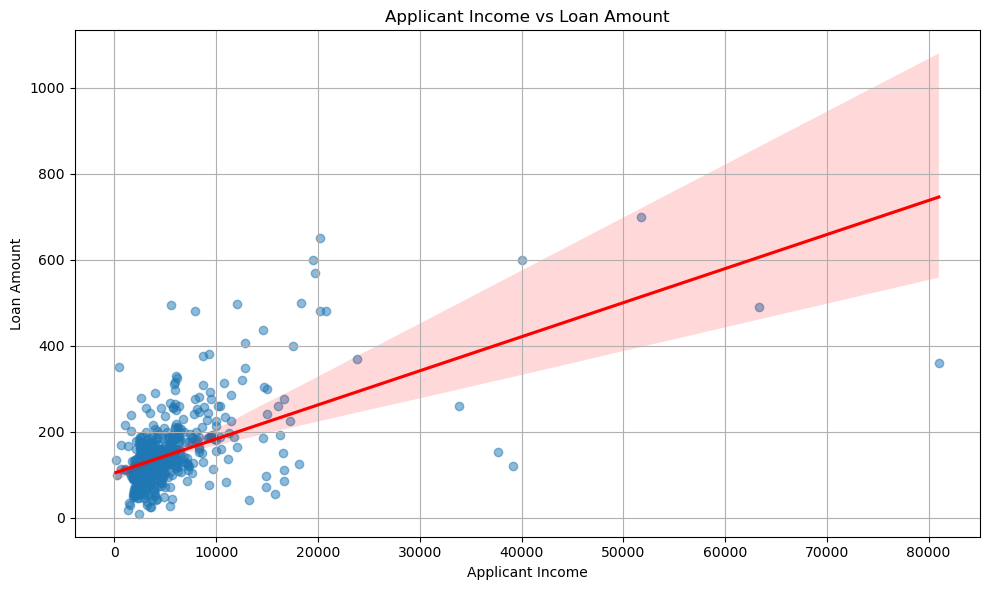

In [15]:
#Applicant_icome vs loan_ammount
plt.figure(figsize=(10, 6))
sns.regplot(x='ApplicantIncome', y='LoanAmount', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# Data Preprocessing

In [16]:
#Fill Missing Values

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [17]:
# Dependent column values

df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [18]:
# Replacing 3+ in dependent column with 3

df['Dependents'] = df['Dependents'].replace('3+', '3')

# Convert Dependents column to integer

df['Dependents'] = df['Dependents'].astype(int)

In [19]:
# removing unnecessary columns

df = df.drop(['Loan_ID'], axis = 1)

In [20]:
# Convert Categorical columns to numerical values
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education','Property_Area', 'Self_Employed', 'Loan_Status']:
    df[col] = le.fit_transform(df[col])

In [21]:
# Features & target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [22]:
# Scaling Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Model Building

In [23]:
#Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
#Building Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [27]:
#Checking accuracy_score of Various models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='binary')  # or 'macro', 'micro', 'weighted' for multiclass
    rec = recall_score(y_test, preds, average='binary')
    f1 = f1_score(y_test, preds, average='binary')
    
    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    }
    
    print(f"{name} Metrics:")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1 Score : {f1:.4f}")

Logistic Regression Metrics:
  Accuracy : 0.7886
  Precision: 0.7596
  Recall   : 0.9875
  F1 Score : 0.8587
Random Forest Metrics:
  Accuracy : 0.7642
  Precision: 0.7525
  Recall   : 0.9500
  F1 Score : 0.8398
Decision Tree Metrics:
  Accuracy : 0.7154
  Precision: 0.7778
  Recall   : 0.7875
  F1 Score : 0.7826
KNN Metrics:
  Accuracy : 0.7561
  Precision: 0.7451
  Recall   : 0.9500
  F1 Score : 0.8352
SVM Metrics:
  Accuracy : 0.7886
  Precision: 0.7596
  Recall   : 0.9875
  F1 Score : 0.8587
Gradient Boosting Metrics:
  Accuracy : 0.7480
  Precision: 0.7526
  Recall   : 0.9125
  F1 Score : 0.8249


In [31]:
# Best Model
best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
best_accuracy = results[best_model_name]['Accuracy']

print(f"\nBest Model: {best_model_name} with Accuracy = {best_accuracy:.4f}")


Best Model: Logistic Regression with Accuracy = 0.7886


In [ ]:
# Final Training and Evaluation
best_model = models[best_model_name]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [ ]:
# Testing Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy of Best Model ({best_model_name}): {test_accuracy:.4f}")

# Web Deployment

In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)